####**LEVEL 2 TASK-2**

Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- This part handles the file upload in Colab ---
print("Please upload your 'Dataset .csv' file:")
uploaded = files.upload()

# Get the file name you just uploaded
file_name = list(uploaded.keys())[0]
print(f"\nSuccessfully uploaded {file_name}")

# --- Task 1: Load the dataset and explore rows/columns ---
df = pd.read_csv(file_name)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Please upload your 'Dataset .csv' file:


Saving full_dataset.csv to full_dataset.csv

Successfully uploaded full_dataset.csv

The dataset has 9551 rows and 21 columns.


##**1.Determine the most common price range**

--- Most Common Price Range ---
Total restaurants: 9551
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


The most common price range is: '1'
It appears 4444 times, making up 46.53% of all restaurants.

Generating plot for price range distribution...


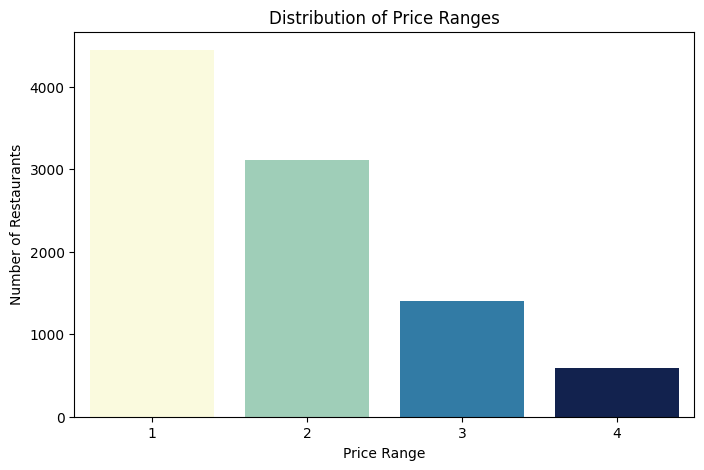

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Task 1: Determine the most common price range ---

print("--- Most Common Price Range ---")
# Get the counts for each price range
price_range_counts = df['Price range'].value_counts()

# Find the most common one (the index of the first item)
most_common_price_range = price_range_counts.idxmax()
most_common_count = price_range_counts.max()
total_restaurants = price_range_counts.sum()
percentage = (most_common_count / total_restaurants) * 100

print(f"Total restaurants: {total_restaurants}")
print(price_range_counts.sort_index()) # Show all counts, sorted by price range
print("\n")
print(f"The most common price range is: '{most_common_price_range}'")
print(f"It appears {most_common_count} times, making up {percentage:.2f}% of all restaurants.")

# --- Visualize this ---
print("\nGenerating plot for price range distribution...")
plt.figure(figsize=(8, 5))
# Use 'Price range' directly as a categorical variable
sns.countplot(data=df, x='Price range', palette='YlGnBu', hue='Price range', legend=False)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.savefig('price_range_distribution.png')
plt.show()

##**2.Calculate the average rating for each price range**

--- Average Rating by Price Range ---
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


Generating plot for average rating by price range...


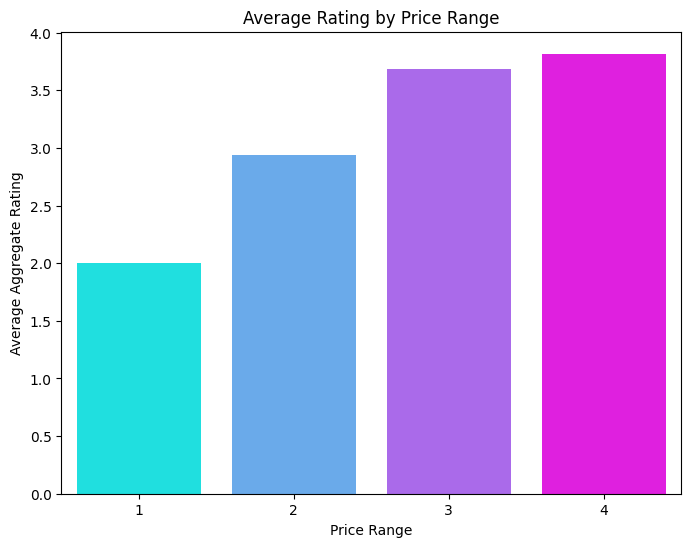

In [8]:
print("--- Average Rating by Price Range ---")
# Group by 'Price range' and get the mean 'Aggregate rating'
# We use .dropna() on 'Aggregate rating' rows to exclude 'Not Rated' restaurants
average_rating_by_price = df.dropna(subset=['Aggregate rating']).groupby('Price range')['Aggregate rating'].mean()

print(average_rating_by_price)
print("\n")

# --- Visualize this ---
print("Generating plot for average rating by price range...")
plt.figure(figsize=(8, 6))
# We reset_index() to turn the grouped data back into a DataFrame for plotting
sns.barplot(data=average_rating_by_price.reset_index(),
            x='Price range',
            y='Aggregate rating',
            palette='cool',
            hue='Price range',
            legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.savefig('average_rating_by_price_range.png')
plt.show()

##**3.Identify the color for the highest average rating**

--- Average Rating by Rating Color ---
Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64


The color representing the highest average rating is: 'Dark Green'
It has an average rating of: 4.66

Generating plot for average rating by color...


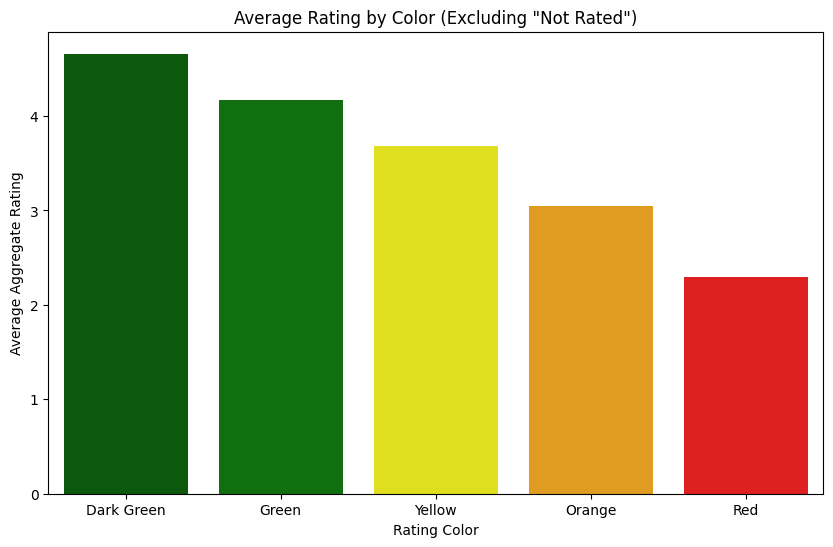

In [9]:
print("--- Average Rating by Rating Color ---")
# Group by 'Rating color' and get the mean 'Aggregate rating'
average_rating_by_color = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)

print(average_rating_by_color)
print("\n")

# Get the color with the highest average rating
highest_rated_color = average_rating_by_color.idxmax()
highest_average_rating = average_rating_by_color.max()

print(f"The color representing the highest average rating is: '{highest_rated_color}'")
print(f"It has an average rating of: {highest_average_rating:.2f}")


print("\nGenerating plot for average rating by color...")

# 1. Filter out 'White' (Not rated) for a cleaner plot
plot_data = average_rating_by_color[average_rating_by_color.index != 'White']

# 2. Create the list of color names for the palette
# We map 'Dark Green' to 'darkgreen' so Matplotlib can read it
color_palette = ['darkgreen', 'green', 'yellow', 'orange', 'red']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_data.reset_index(),
    x='Rating color',
    y='Aggregate rating',
    # 3. Pass our corrected color list to the palette
    palette=color_palette,
    hue='Rating color',
    # 4. Use the filtered index to keep the correct sort order
    order=plot_data.index,
    legend=False
)
plt.title('Average Rating by Color (Excluding "Not Rated")')
plt.xlabel('Rating Color')
plt.ylabel('Average Aggregate Rating')
plt.savefig('average_rating_by_color.png')
plt.show()